# Link to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
import plotly.express as px
import sklearn
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from sklearn.utils import resample
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
from scipy.stats import kruskal
plt.rcParams.update({'font.size': 7})

In [6]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

# Import Dataset

In [7]:
df = pd.read_csv(r'/content/drive/MyDrive/MZVAV-1 (Sim-Full year).csv')
df = pd.DataFrame(df)
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Data Preprocessing

## Take a Quick Look at the Data Structure

In [6]:
df.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,2017-01-30 00:00:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
1,2017-01-30 00:01:00,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
2,2017-01-30 00:02:00,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
3,2017-01-30 00:03:00,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
4,2017-01-30 00:04:00,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0


In [7]:
df.tail()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
272155,2017-12-17 23:55:00,55.04,55.04,17.89,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272156,2017-12-17 23:56:00,55.04,55.04,17.87,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272157,2017-12-17 23:57:00,55.04,55.04,17.85,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272158,2017-12-17 23:58:00,55.04,55.04,17.83,62.52,62.52,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272159,2017-12-17 23:59:00,55.04,55.04,17.82,62.52,62.52,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272160 entries, 0 to 272159
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   Datetime                                        272160 non-null  datetime64[ns]
 1   AHU: Supply Air Temperature                     272160 non-null  float64       
 2   AHU: Supply Air Temperature Set Point           272160 non-null  float64       
 3   AHU: Outdoor Air Temperature                    272160 non-null  float64       
 4   AHU: Mixed Air Temperature                      272160 non-null  float64       
 5   AHU: Return Air Temperature                     272160 non-null  float64       
 6   AHU: Supply Air Fan Status                      272160 non-null  int64         
 7   AHU: Return Air Fan Status                      272160 non-null  int64         
 8   AHU: Supply Air Fan Speed Control 

In [9]:
df.describe()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,272160,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000
mean,2017-07-11 19:06:10.000000512,53.762030,5.504000e+01,48.357590,65.000186,71.453754,0.670242,0.670242,0.480342,0.480342,0.213219,0.000009,0.043273,0.000077,4.000000e-02,0.034261,0.487654,0.857143
min,2017-01-30 00:00:00,44.950000,5.504000e+01,-14.260000,22.610000,54.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-02,-0.020000,0.000000,0.000000
25%,2017-03-18 05:59:45,52.000000,5.504000e+01,36.320000,57.030000,70.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,4.000000e-02,0.000000,0.000000,1.000000
50%,2017-08-03 11:59:30,54.070000,5.504000e+01,52.340000,65.570000,72.010000,1.000000,1.000000,0.640000,0.640000,0.000000,0.000000,0.020000,0.000000,4.000000e-02,0.040000,0.000000,1.000000
75%,2017-10-31 17:59:15,55.040000,5.504000e+01,62.610000,72.020000,74.260000,1.000000,1.000000,0.670000,0.670000,0.240000,0.000000,0.040000,0.000000,4.000000e-02,0.040000,1.000000,1.000000
max,2017-12-17 23:59:00,72.030000,5.504000e+01,90.140000,78.720000,87.870000,1.000000,1.000000,1.000000,1.000000,1.000000,2.450000,0.600000,1.000000,4.000000e-02,0.120000,1.000000,1.000000
std,NaN,2.545891,3.741583e-10,20.154449,7.409942,3.702466,0.470126,0.470126,0.353275,0.353275,0.325107,0.004696,0.083905,0.008784,1.908546e-13,0.032849,0.499848,0.349928


## Missing Values

In [11]:
# check for missin values
print(f'total number of missing values: {df.isnull().sum().sum()}')

total number of missing values: 0


## create a dataset using only basic variables (features)

In [8]:
df.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,2017-01-30 00:00:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
1,2017-01-30 00:01:00,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
2,2017-01-30 00:02:00,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
3,2017-01-30 00:03:00,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
4,2017-01-30 00:04:00,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0


In [9]:
nonbasic_points = ['AHU: Supply Air Temperature Set Point', 'AHU: Supply Air Fan Status',
       'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point']
df = df.drop(nonbasic_points, axis=1)
df.head()

,Datetime,AHU: Supply Air Temperature,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,2017-01-30 00:00:00,68.00,32.00,68.00,75.20,0.0,0,0
1,2017-01-30 00:01:00,67.99,32.00,66.71,75.20,0.0,0,0
2,2017-01-30 00:02:00,67.99,-5.93,66.71,74.45,0.0,0,0
3,2017-01-30 00:03:00,67.99,-5.88,66.71,74.04,0.0,0,0
4,2017-01-30 00:04:00,67.99,-5.83,66.71,73.56,0.0,0,0


## Build a Correlation heatmap of the Dataset

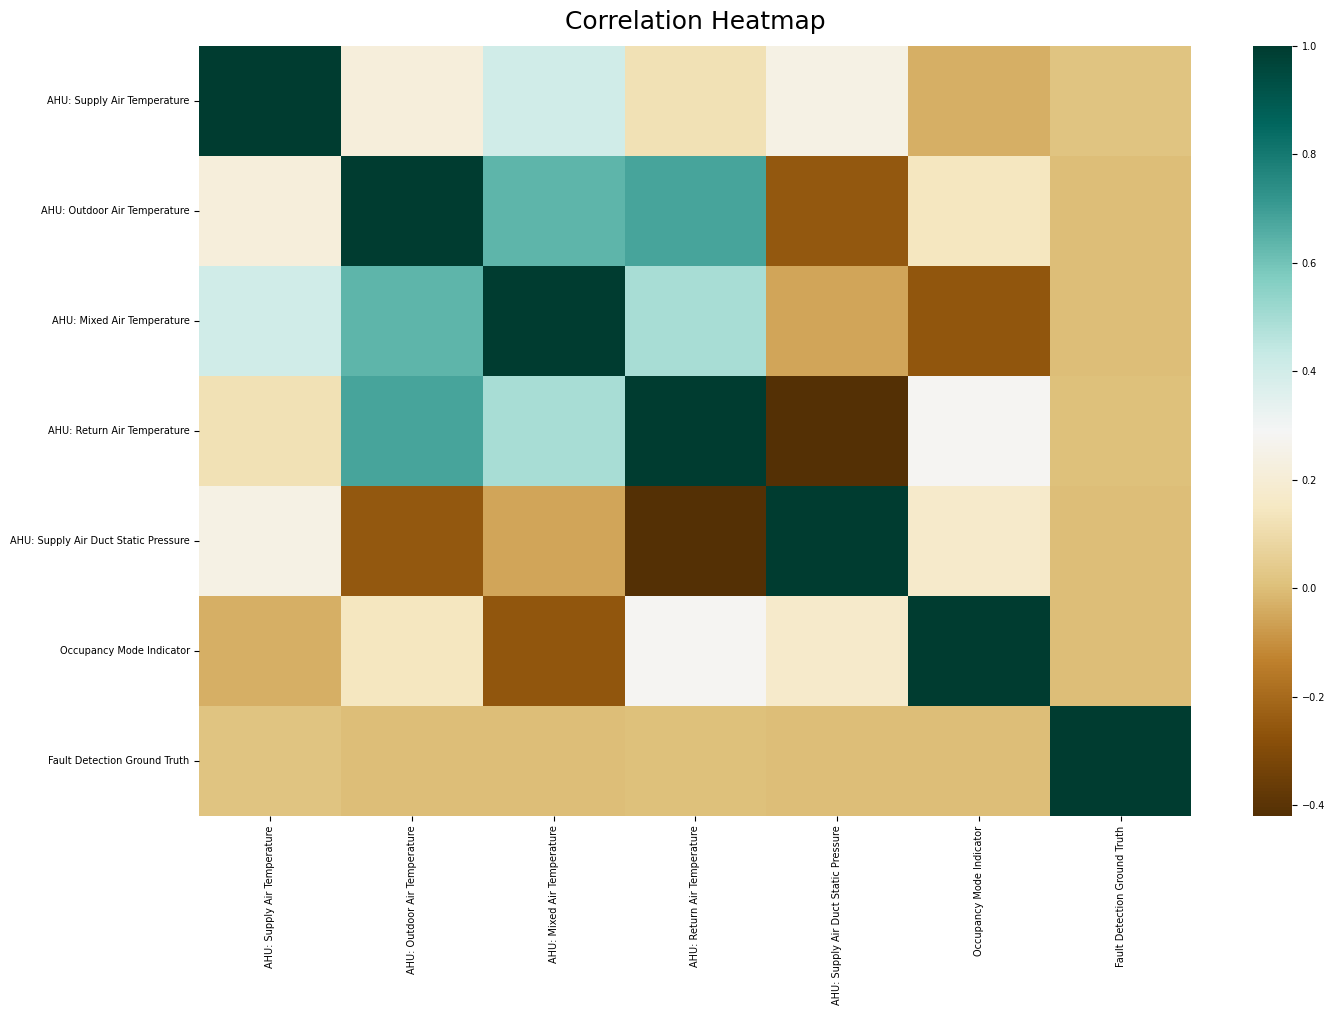

In [8]:
dff = df
dff.drop(['Datetime'], axis=1, inplace=True)
corr_matrix = dff.corr()
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(dff.corr(),  cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

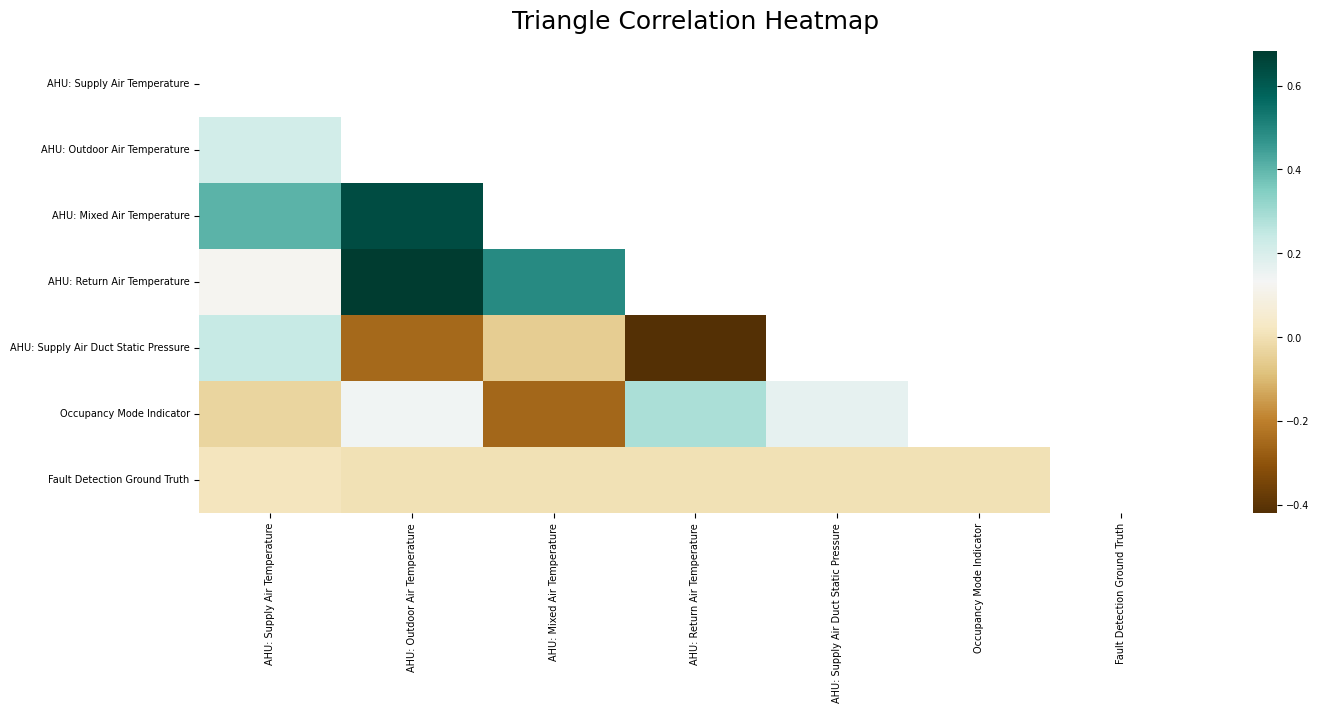

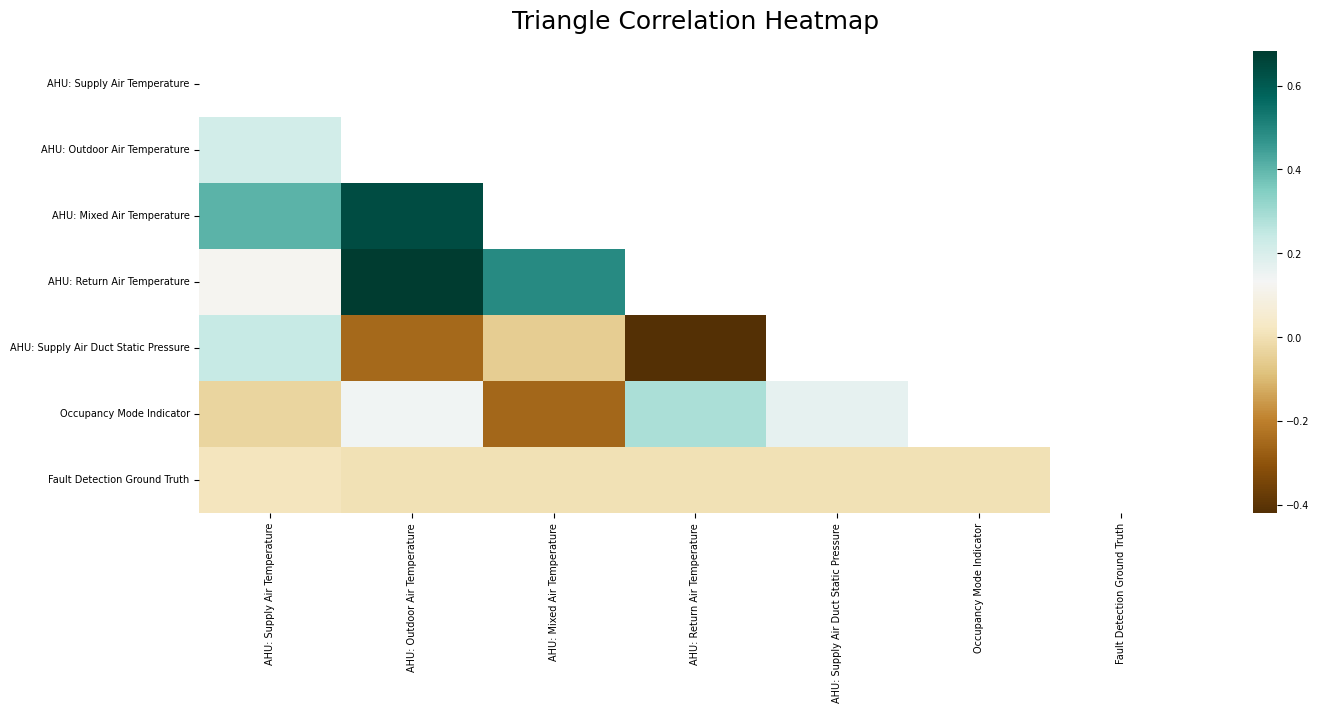

In [9]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dff.corr()))
heatmap = sns.heatmap(dff.corr(), mask=mask,  cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dff.corr()))
heatmap = sns.heatmap(dff.corr(), mask=mask,  cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [12]:
corr_matrix = corr_matrix.abs()

threshold = 0.50

# Find pairs of features with correlation greater than the threshold
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for i, col1 in enumerate(corr_matrix.columns)
    for col2 in corr_matrix.columns[i + 1:]
    if corr_matrix.loc[col1, col2] > threshold
]

# Convert to DataFrame for easier viewing
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

,Variable 1,Variable 2,Correlation
0,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,0.638119
1,AHU: Outdoor Air Temperature,AHU: Return Air Temperature,0.684022


## Check whether the dataset is balanced

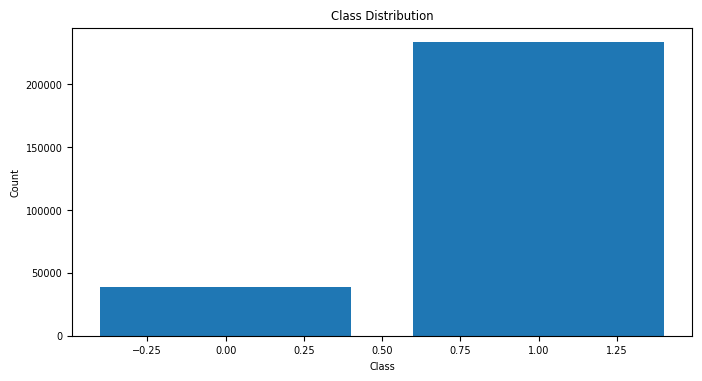

The dataset is not balanced


In [13]:
# check whether the dataset is balanced

plt.figure(figsize=(8, 4))
plt.bar(df['Fault Detection Ground Truth'].value_counts().index, df['Fault Detection Ground Truth'].value_counts().values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

if sum(df['Fault Detection Ground Truth'].value_counts().values)/len(df['Fault Detection Ground Truth'].value_counts().values) == df['Fault Detection Ground Truth'].value_counts().values[0]:
   print('The dataset is balanced')
else:
   print('The dataset is not balanced')

<Axes: ylabel='Type'>

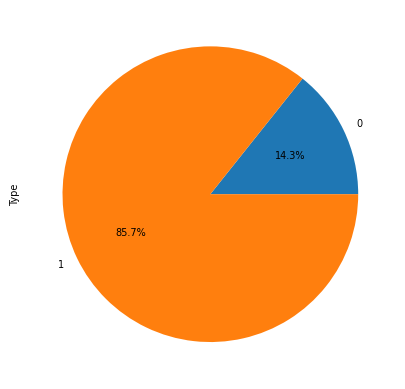

In [14]:
df.groupby('Fault Detection Ground Truth').size().plot(kind='pie',
                                       y = "label",
                                       label = "Type",
                                       autopct='%1.1f%%')

## Handling Imbalanced Data with SVMSMOTE technique

In [11]:
df = df.drop('Datetime', axis=1)
from imblearn.over_sampling import SVMSMOTE
X = df.drop('Fault Detection Ground Truth', axis=1)
y = df[['Fault Detection Ground Truth']]

# Initialize SVM_SMOTE
svm_smote = SVMSMOTE(random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = svm_smote.fit_resample(X, y)

<Axes: ylabel='Type'>

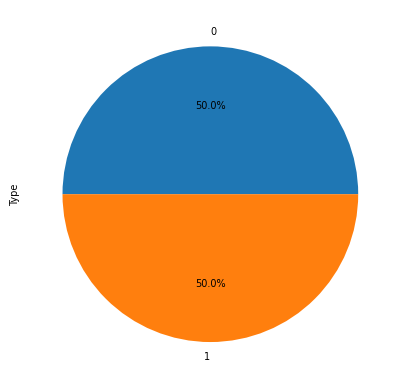

In [12]:
y_resampled.groupby('Fault Detection Ground Truth').size().plot(kind='pie',
                                       y = "Fault Detection Ground Truth",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [15]:
# Combine X_resampled and y_resampled into a new DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Fault Detection Ground Truth'] = y_resampled

# Now resampled_df is your new balanced dataset
df = resampled_df

In [18]:
df.shape

(466560, 7)

In [19]:
df.head()

,AHU: Supply Air Temperature,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,68.00,32.00,68.00,75.20,0.0,0,0
1,67.99,32.00,66.71,75.20,0.0,0,0
2,67.99,-5.93,66.71,74.45,0.0,0,0
3,67.99,-5.88,66.71,74.04,0.0,0,0
4,67.99,-5.83,66.71,73.56,0.0,0,0


# Developing data_driven FDD models

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

X = df.drop('Fault Detection Ground Truth', axis=1)
y = df['Fault Detection Ground Truth'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Dictionary to store predictions and true values
predictions = {}
classification_reports = {}

# Train, predict, and store results for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    classification_reports[name] = classification_report(y_test, y_pred, digits=4)

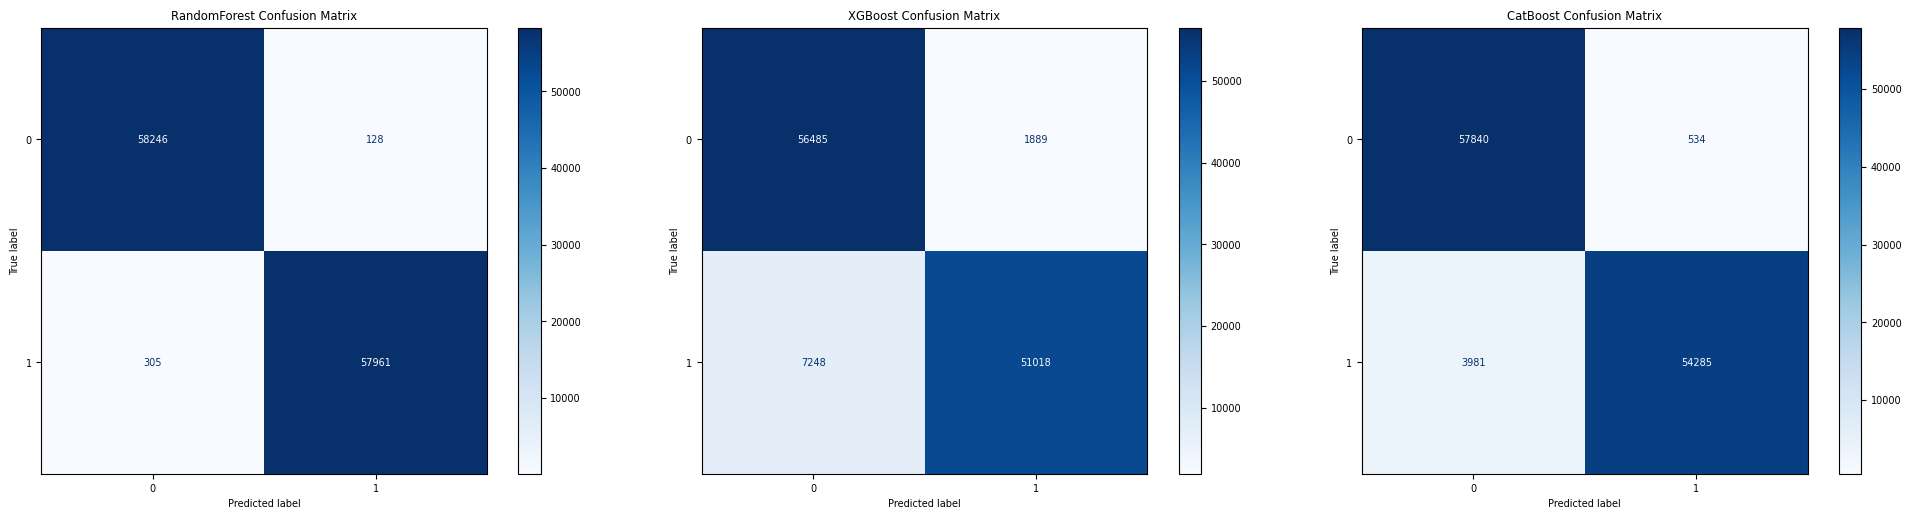

In [25]:
# Plot confusion matrices in subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
plt.tight_layout()
plt.show()

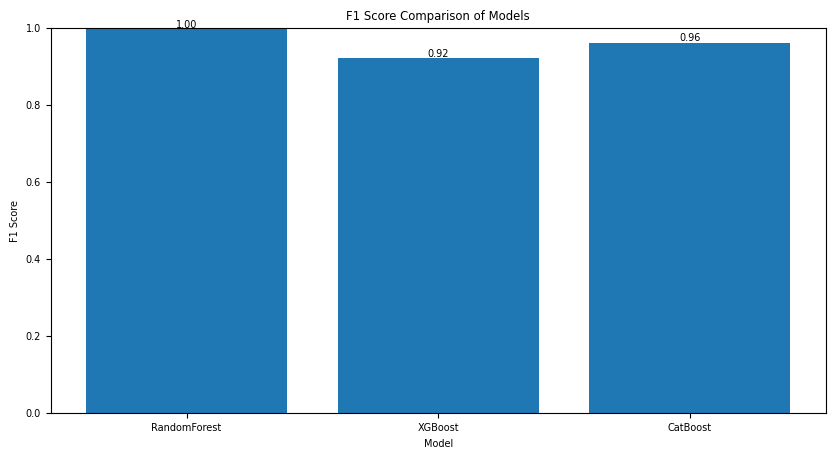

In [26]:
# Bar plot for F1 score
f1_scores = [f1_score(y_test, y_pred, average='weighted') for y_pred in predictions.values()]  # Calculate F1 score
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), f1_scores)
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1, f'{f1:.2f}', ha='center', va='bottom')  # Display F1 score on top of the bars
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Models')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()